In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit
import seaborn as sns
plt.style.use('ggplot')

#these are user defined modules
import plot
import calculate


# CAREER_LENGTH = 15 means the authors who have atleast 15 years of experience
# CAREER_LENGTH_LIST = [0,5,10,15,20,25]
CAREER_LENGTH = 1
MAX_CAREER_LENGTH_COHORT = 15
END_YEAR = 2018


#print(calculate.cliffsD([1, 2, 3, 4, 5, 9], [1, 2, 5, 6, 7, 9]))

## Cohort Analysis

For each (filtered) cohort analyze how the distribution of publications and citations changes in the cohort over time.
At the beginning all scientists should be equal (they have zero publications and citations). Over time some scientists become more productive and/or successful than others which leads to an increase in the Gini coefficient.

### Read authors with start and end year details

In [2]:
authorStartEndCareerData = pd.read_csv('./derived-data/authors-scientific-atleast-'+str(CAREER_LENGTH)+'-year-extended.csv')
authorStartEndCareerData.head()

,author,start_year,end_year,num_pub,career_length,max_absence,avg_absence,dropped_after_10,gender,early_career_qual,early_career_recognition,succ_after_15y,early_career_prod
0,'maseka lesaoana,2001,2015,2,15,14,7.5,True,none,23.0,5.0,23.0,1
1,(max) zong-ming cheng,2009,2011,2,3,13,7.5,True,none,4.0,4.0,4.0,2
2,(zhou) bryan bai,2011,2012,2,2,14,7.5,True,none,0.0,0.0,0.0,2
3,a aart blokhuis,1992,2005,2,14,13,7.5,True,none,0.0,0.0,0.0,1
4,a ahrabian,2017,2017,1,1,15,15.0,True,none,0.0,0.0,0.0,1


### Read Citation data (uses paper->author network)

In [3]:
authorCitationsData = pd.read_csv('derived-data/authors-perYear-citations-atleast-'+str(CAREER_LENGTH)+'-year.csv')
authorCitationsData.rename(columns={'year_cit':'year', 'cit_count':'num_cit'}, inplace=True)

#### Tests

In [4]:
# 'maseka lesaoana published 2 publications in total, one in 2001 and one in 2015
# for the one is 2015 she did not get yet any citations
authorCitationsData[authorCitationsData["author"] == "'maseka lesaoana"]

,author,year,num_cit
0,'maseka lesaoana,2002,1
1,'maseka lesaoana,2003,1
2,'maseka lesaoana,2004,1
3,'maseka lesaoana,2005,2
4,'maseka lesaoana,2006,4
5,'maseka lesaoana,2007,1
6,'maseka lesaoana,2008,3
7,'maseka lesaoana,2009,1
8,'maseka lesaoana,2010,1
9,'maseka lesaoana,2012,1


In [5]:
authorStartEndCareerData[authorStartEndCareerData["author"] == "'maseka lesaoana"]

,author,start_year,end_year,num_pub,career_length,max_absence,avg_absence,dropped_after_10,gender,early_career_qual,early_career_recognition,succ_after_15y,early_career_prod
0,'maseka lesaoana,2001,2015,2,15,14,7.5,True,none,23.0,5.0,23.0,1


In [6]:
# (max) zong-ming cheng published 2 publications in total, one in 2009 and one in 2012
authorCitationsData[authorCitationsData["author"] == '(max) zong-ming cheng']

,author,year,num_cit
14,(max) zong-ming cheng,2009,1
15,(max) zong-ming cheng,2010,2
16,(max) zong-ming cheng,2013,1


In [7]:
# BUG: no zeros????
authorCitationsData["num_cit"].value_counts()

1       2333764
2       1102192
3        651606
4        438479
5        318124
6        242417
7        191742
8        156375
9        130649
10       110405
11        94135
12        81732
13        72071
14        63481
15        56514
16        51177
17        46018
18        41668
19        38021
20        35017
21        31704
22        29539
23        27329
24        25540
25        23550
26        21842
27        20763
28        19138
29        17848
30        16777
         ...   
1469          1
1471          1
1517          1
1557          1
1555          1
1550          1
1547          1
1537          1
1531          1
1528          1
1527          1
1526          1
1522          1
1520          1
1519          1
1515          1
1472          1
1506          1
1504          1
1500          1
1494          1
1490          1
1485          1
1483          1
1482          1
1478          1
1477          1
1475          1
1473          1
3937          1
Name: num_cit, Length: 1

### Merge citations with authors

In [8]:
authorCitationsData = authorCitationsData.merge(authorStartEndCareerData[['author', 'start_year', 'gender']], on='author')

### Citation distribution after 15 years

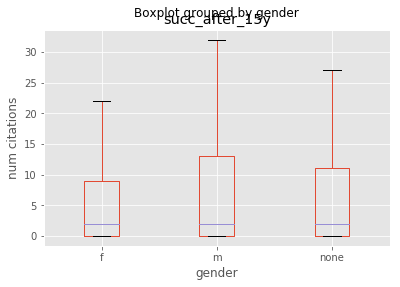

In [9]:
ax = authorStartEndCareerData.boxplot(column='succ_after_15y', by='gender', showfliers=False)
ax.set_ylabel("num citations")
ax.set_xlabel("gender")
plt.show()

# Cohort Analysis on all authors for 15 years

#### Select Cohorts based on Start Years

In [21]:
groupByYearData = calculate.groupDataAndCalculateCumulativeValues(authorCitationsData, 1, 'num_cit')

In [22]:
groupByYearData.shape

(6967113, 6)

In [23]:
years = authorCitationsData['year'].unique()
years = sorted(years)
print(years)

cohort_start_years = [y for y in years if y < (END_YEAR - MAX_CAREER_LENGTH_COHORT)]

[1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


In [73]:
from importlib import reload
reload(plot)
reload(calculate)

<module 'calculate' from '/home/danielkostic/cumulative-advantage/calculate.py'>

#### Tests

In [ ]:
# some plausibility checks
print(groupByYearData.head(n=1))
print(groupByYearData[groupByYearData['author'] == '\'maseka lesaoana'].head(10))

# (max) zong-ming cheng published 2 publications in total, one in 2009 and one in 2012
# in 2011 he received 0 citations and after 2013 as well!!!
print(groupByYearData[groupByYearData["author"] == '(max) zong-ming cheng'])

### Cohort Analysis (Num Cit)

plot_gini


/home/danielkostic/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/danielkostic/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


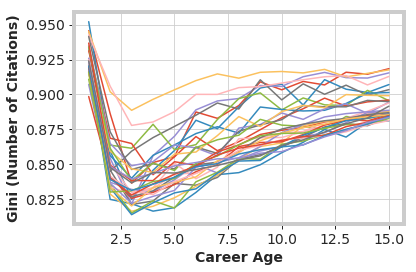

plot_cohort_size_gini_cor
unique_career_ages:
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


/home/danielkostic/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


,cohort_start_year,cohort_size,age,criterion,mean,std,sem,median,mean_f,median_f,std_f,sem_f,mean_m,median_m,std_m,sem_m,mean_n,median_n,std_n,sem_n
0,1970,763,1,num_cit,0.102228,0.425323,0.015398,1.000000e-07,0.085714,0.0,0.368117,0.062223,0.079327,0.0,0.361561,0.017727,0.134615,0.0,0.501108,0.02837


plot_cohort_means_over_ages


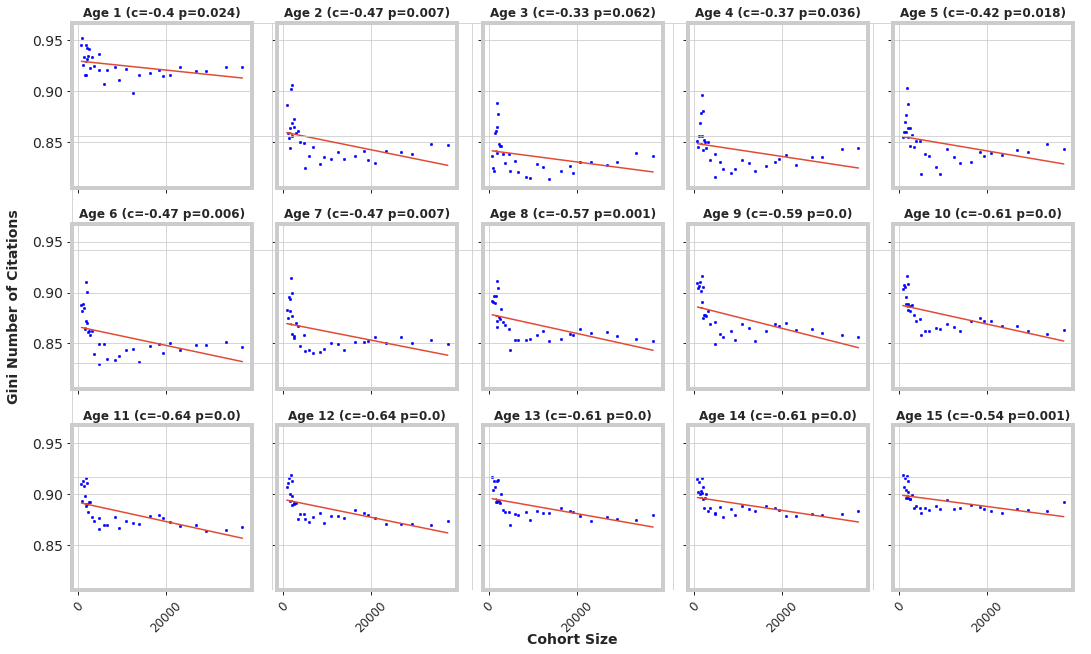

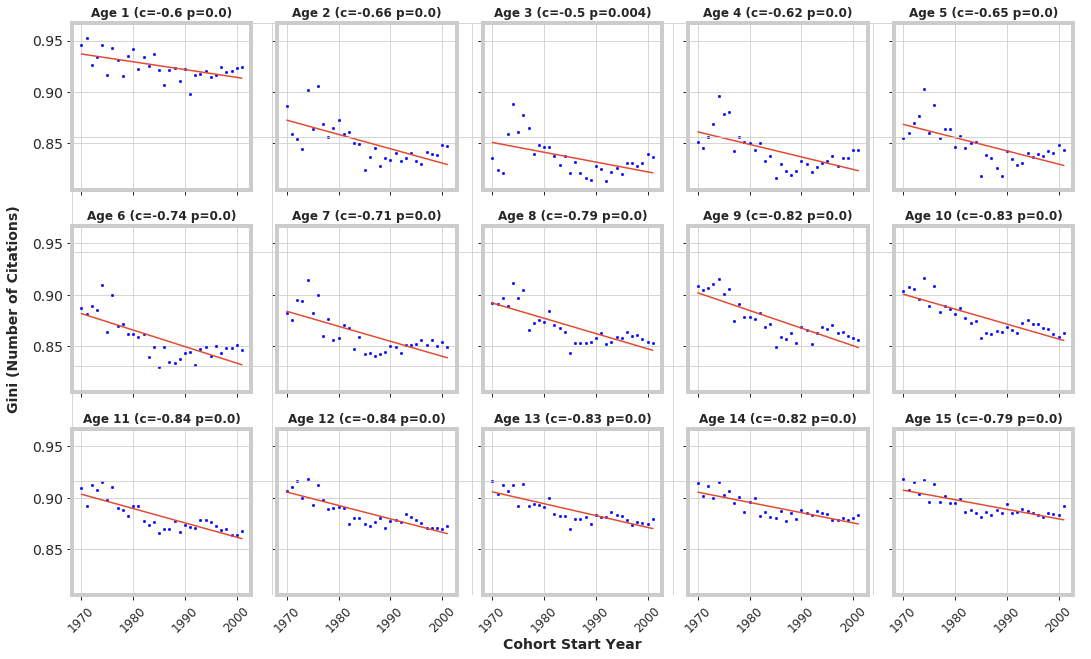

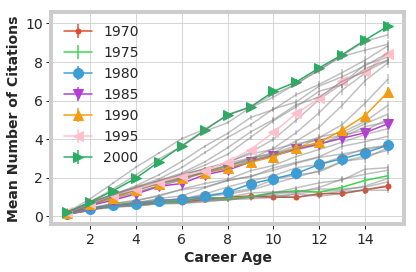

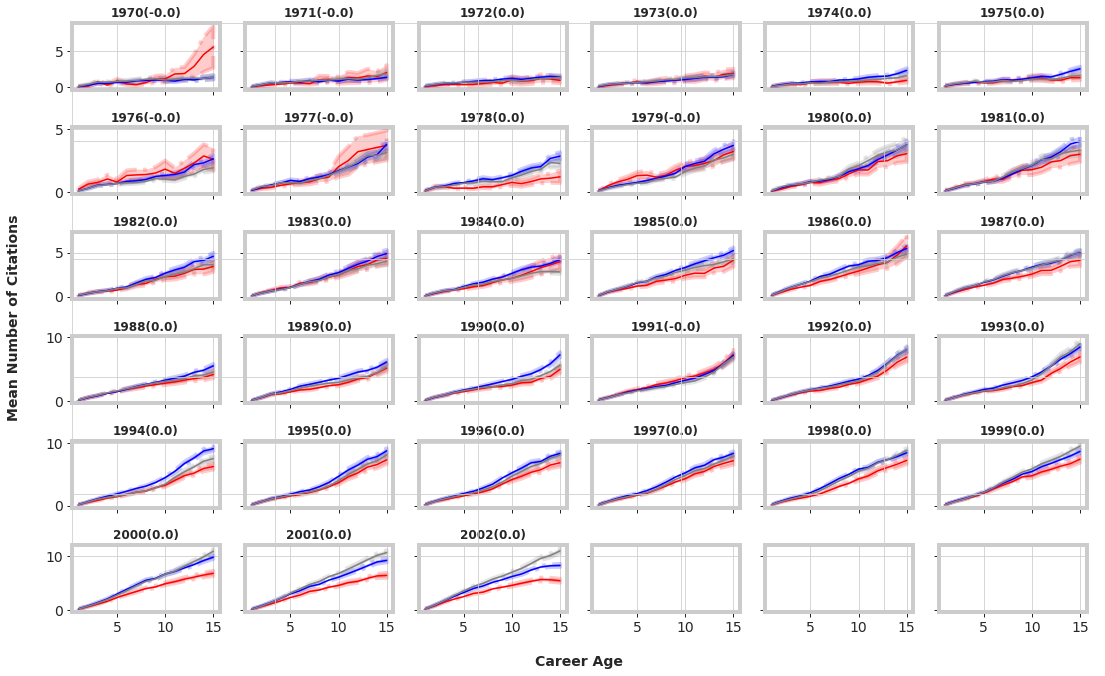

plot_gini [1970, 2000]


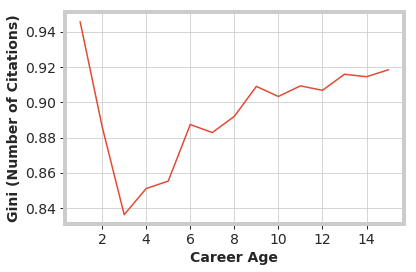

plot_gini [1970, 1980, 1990, 2000]


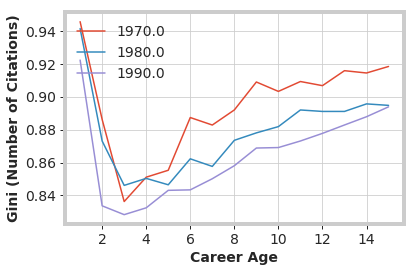

,cohort_start_year,career_age,values,effect,statistic,pvalue
0,1970,1,"([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.000954,7295.0,0.962008
1,1970,2,"([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.023558,7650.5,0.432456
2,1970,3,"([1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.055732,6403.5,0.126827
3,1970,4,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.048738,8046.5,0.161758
4,1970,5,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...",0.034590,6736.0,0.337080


plot_cohort_effect_size


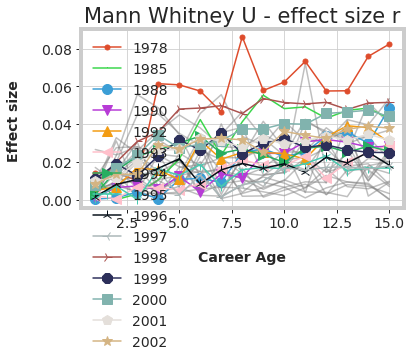

In [74]:
plot.run_cohort_analysis(authorCitationsData, cohort_start_years, MAX_CAREER_LENGTH_COHORT, "num_cit", "Number of Citations", authorStartEndCareerData)  

#### Tests

In [28]:
criterion = "num_cit"

In [ ]:
cohort_careerage_df = plot.get_cohort_careerage_df(groupByYearData, cohort_start_years, MAX_CAREER_LENGTH_COHORT,
                                                   "num_cit", authorStartEndCareerData)

#gini
cohort_size_gini = get_cohort_size_gini(cohort_careerage_df,criterion, cohort_careerage_df["cohort_start_year"].unique())
#cohort_size_gini = get_cohort_gini(cohort_careerage_df,criterion, np.array([1970, 1980, 1990, 2000]))

print("plot_gini")
plot_gini(cohort_size_gini, criterion, criterion_display)
print("plot_cohort_size_gini_cor")
plot_cohort_size_gini_cor(cohort_size_gini,  criterion, criterion_display)

# mean/std/median
stats = get_cohort_stats(cohort_careerage_df, criterion)
print(stats.head(n=1))
# doesnt plot anything
#     plot_cohort_gender_diffs(stats, criterion, criterion_display)
print("plot_cohort_means_over_ages")
plot_cohort_means_over_ages(stats, criterion, criterion_display)

# plot overall gini for all authors that started between 1970 and 2000, ignore cohorts
cohort_size_gini = get_cohort_size_gini(cohort_careerage_df,criterion, np.array([1970, 2000]))
print("plot_gini [1970, 2000]")
plot_gini(cohort_size_gini, criterion+"_ALL_AUTHORS", criterion_display)

cohort_size_gini = get_cohort_size_gini(cohort_careerage_df,criterion, np.array([1970, 1980, 1990, 2000]))
print("plot_gini [1970, 1980, 1990, 2000]")
plot_gini(cohort_size_gini, criterion+"_COHORTS_10_YEARS", criterion_display)

# plot effect size 
cohort_effect_size = get_cohort_effect_size(cohort_careerage_df)
print("plot_cohort_effect_size")
plot_cohort_effect_size(cohort_effect_size)

In [24]:
cohort_careerage_df = plot.get_cohort_careerage_df(groupByYearData, cohort_start_years, MAX_CAREER_LENGTH_COHORT,
                                                   "num_cit", authorStartEndCareerData)


In [70]:
from IPython.display import display
display(cohort_careerage_df.head())

,cohort_start_year,career_age,criterion,gender,values
0,1970,1,num_cit,all,"[1.0000007000000004, 7e-07, 7e-07, 7e-07, 7e-0..."
1,1970,1,num_cit,m,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,1970,1,num_cit,f,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, ..."
3,1970,1,num_cit,none,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,1970,2,num_cit,all,"[7e-07, 7e-07, 1.0000007000000004, 1.000000700..."


In [36]:
cohort_size_gini_all = plot.get_cohort_size_gini(cohort_careerage_df,criterion, cohort_careerage_df["cohort_start_year"].unique())

In [37]:
cohort_size_gini_10 = plot.get_cohort_size_gini(cohort_careerage_df,criterion, np.array([1970, 1980, 1990, 2000]))

In [46]:
cohort_size_gini_10[cohort_size_gini_10['cohort_start_year'] == 1980]

,cohort_start_year,cohort_size,age,gini
15,1980.0,2458.0,1.0,0.941542
16,1980.0,2458.0,2.0,0.873105
17,1980.0,2458.0,3.0,0.846104
18,1980.0,2458.0,4.0,0.850360
19,1980.0,2458.0,5.0,0.846470
20,1980.0,2458.0,6.0,0.862269
21,1980.0,2458.0,7.0,0.857656
22,1980.0,2458.0,8.0,0.873530
23,1980.0,2458.0,9.0,0.878057
24,1980.0,2458.0,10.0,0.881867


In [47]:
cohort_size_gini_all[cohort_size_gini_all['cohort_start_year'] == 1980]

,cohort_start_year,cohort_size,age,gini
150,1980.0,2458.0,1.0,0.941543
151,1980.0,2458.0,2.0,0.873106
152,1980.0,2458.0,3.0,0.846104
153,1980.0,2458.0,4.0,0.850360
154,1980.0,2458.0,5.0,0.846470
155,1980.0,2458.0,6.0,0.862270
156,1980.0,2458.0,7.0,0.857656
157,1980.0,2458.0,8.0,0.873530
158,1980.0,2458.0,9.0,0.878057
159,1980.0,2458.0,10.0,0.881867


In [53]:
cohort_size_gini_all[cohort_size_gini_all.cohort_start_year == 2001]

,cohort_start_year,cohort_size,age,gini
465,2001.0,37405.0,1.0,0.924053
466,2001.0,37405.0,2.0,0.847589
467,2001.0,37405.0,3.0,0.836506
468,2001.0,37405.0,4.0,0.843916
469,2001.0,37405.0,5.0,0.843571
470,2001.0,37405.0,6.0,0.846050
471,2001.0,37405.0,7.0,0.849020
472,2001.0,37405.0,8.0,0.852865
473,2001.0,37405.0,9.0,0.855879
474,2001.0,37405.0,10.0,0.863415


In [51]:
cohort_careerage_df["cohort_start_year"].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002],
      dtype=object)

In [56]:
groupByYearData[groupByYearData['year'] == 2018].shape

(2356, 6)

In [58]:
groupByYearData[groupByYearData['year'] == 2018]['num_cit'].sum()

4147

In [ ]:
from importlib import reload
reload(plot)

cohort_careerage_df = plot.get_cohort_careerage_df(groupByYearData, cohort_start_years, MAX_CAREER_LENGTH_COHORT, 
                                                   "cum_num_cit", authorStartEndCareerData)

#------------------------------------------

In [ ]:
cohort_careerage_df.head()

In [ ]:
subset1 = cohort_careerage_df[(cohort_careerage_df.cohort_start_year == 1991) & (cohort_careerage_df.career_age == 1) & 
                              (cohort_careerage_df.gender == "all")]
vals1 = subset1["values"]

subset10 = cohort_careerage_df[(cohort_careerage_df.cohort_start_year == 1991) & (cohort_careerage_df.career_age == 10) & 
                               (cohort_careerage_df.gender == "all")]
vals10 = subset10["values"]

from collections import Counter

print(type(vals1))
print(Counter(vals1.values[0]))
print(len(vals1.values[0]))


print(type(vals10))
print(Counter(vals10.values[0]))
print(len(vals10.values[0]))

### Cohort Analysis (Cum Num Cit)

In [ ]:
plot.run_cohort_analysis(groupByYearData, cohort_start_years, 
                         MAX_CAREER_LENGTH_COHORT, "cum_num_cit", "Cumulative Number of Citations", authorStartEndCareerData)  

# What should i do with the rest of this notebook?

### Cumulative Distributions for Selected Cohorts and Career Ages

how do these distributions differ?

In [ ]:
# cohort_start_years = [1974, 1975, 1976, 1979, 2000]

# cohort_careerage_df = plot.get_cohort_careerage_df(authorCitationsData, cohort_start_years, CAREER_LENGTH, 'num_cit')
# plot.plot_cumulative_dist(cohort_careerage_df, 1, 'num_cit', 'Number of Citations')
# plot.plot_cumulative_dist(cohort_careerage_df, 5, 'num_cit', 'Number of Citations')
# plot.plot_cumulative_dist(cohort_careerage_df, 10, 'num_cit', 'Number of Citations')
# plot.plot_cumulative_dist(cohort_careerage_df, 15, 'num_cit', 'Number of Citations')

# cohort_careerage_df = plot.get_cohort_careerage_df(authorCitationsData, cohort_start_years, CAREER_LENGTH, 'cum_num_cit')
# plot.plot_cumulative_dist(cohort_careerage_df, 1, 'cum_num_cit', 'Cumulative Number of Citations')
# plot.plot_cumulative_dist(cohort_careerage_df, 5, 'cum_num_cit', 'Cumulative Number of Citations')
# plot.plot_cumulative_dist(cohort_careerage_df, 10, 'cum_num_cit', 'Cumulative Number of Citations')
# plot.plot_cumulative_dist(cohort_careerage_df, 15, 'cum_num_cit', 'Cumulative Number of Citations')

### Why is there a sudden increase in mean citation count for cohort started in 1985?

In [ ]:
# _1985Authors = authorCitationsData[authorCitationsData['start_year'] == 1975] 
# _1985Authors.shape

In [ ]:
# _1985Authors.columns

In [ ]:
# _1985Authors.sort_values(by=['num_cit'], axis = 0, ascending=False,inplace=False)

In [ ]:
# _1995_year_1985Authors = _1985Authors[_1985Authors['year'] >= 1995]
# _1995_2000_year_1985Authors = _1985Authors[_1985Authors['year'] <= 2000]
# print(_1995_2000_year_1985Authors.shape)
# _1995_2000_year_1985Authors.head(10)

In [ ]:
# temp_group = _1995_2000_year_1985Authors.groupby(by=['year','author'])['num_cit']
# temp = temp_group.sum().reset_index().sort_values(by='num_cit',ascending=False)
# temp.head()

# #print(temp1['id2'].unique())

In [ ]:
# donatella = _1985Authors[_1985Authors['author'] == 'donatella sciuto']
# donatella

In [ ]:
# plt.scatter(x=donatella['year'],y=donatella['num_cit'])

In [ ]:
# authorCitationsData[authorCitationsData['author'] == 'donatella sciuto']

## Research Question 1
Is inequality increasing with increasing competition (i.e. do larger cohorts jhave higher inequality?)?
Analyse the correlation plots. Plot signigicance of correlation between cohort size and gini for each career age.

## Research Question 2
How is the position of men and women changing as inequality increases?
We see that the mean cumulative productivity and success are increasing for both groups is a similar way. Some cohorts are different but for most of them no big gender differences are visible.



### Regression Analysis of mean productivity on Inequality for all authors for 15 years
- There is no relation at all - Reg. coefficient is 0

In [ ]:
reload(plot)
#reload(calculate)
#data = plot.plot_regress_performance_on_inequality(groupByYearData, 'num_cit', years, 15)
#print(data.head())

In [ ]:
#reload(plot)
#reload(calculate)
#data = plot.plot_regress_performance_on_inequality(groupByYearData, 'cum_num_cit', years, 15)

### Cohort Analysis, Regression analysis on authors grouped by 2 years for 15 years

In [ ]:
#groupByYearData = authorCitationsData.copy(deep=True)
#print(groupByYearData[groupByYearData['author'] == 'donatella sciuto'].head(10))
#groupByYearData = calculate.groupDataAndCalculateCumulativeValues(groupByYearData, 2, 'num_cit')
#print(groupByYearData[groupByYearData['author'] == 'donatella sciuto'].head(10))

#years = groupByYearData['year'].unique()
#years = sorted(years)
#print(years)

#plot.plot_cohort_analysis_on(groupByYearData, 'num_cit', years, 15, 'Citations Count')
#plot.plot_cohort_analysis_on(groupByYearData, 'cum_num_cit', years, 15, 'Cumulative Citations Count')
#data1 = plot.plot_regress_performance_on_inequality(groupByYearData, 'num_cit', years, 15)
#data2 = plot.plot_regress_performance_on_inequality(groupByYearData, 'cum_num_cit', years, 15)

### Cohort Analysis, Regression analysis on authors grouped by 3 years for 30 years

In [ ]:
#groupByYearData = authorCitationsData.copy(deep=True)
#print(groupByYearData[groupByYearData['author'] == 'donatella sciuto'].head(10))
#groupByYearData = calculate.groupDataAndCalculateCumulativeValues(groupByYearData, 3, 'num_cit')
#print(groupByYearData[groupByYearData['author'] == 'donatella sciuto'].head(10))

#years = groupByYearData['year'].unique()
#years = sorted(years)
#print(years)

#plot.plot_cohort_analysis_on(groupByYearData, 'num_cit', years, 15, 'Citations Count')
#plot.plot_cohort_analysis_on(groupByYearData, 'cum_num_cit', years, 15, 'Cumulative Citations Count')
#data1 = plot.plot_regress_performance_on_inequality(groupByYearData, 'num_cit', years, 15)
#data2 = plot.plot_regress_performance_on_inequality(groupByYearData, 'cum_num_cit', years, 15)